# Pb-208 uncertainty data

In [1]:
import sandy

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

## ENDF/B-VIII.0

In [39]:
err = sandy.get_endf6_file("endfb_80", "xs", 822080).get_errorr(err=1, chi=False, mubar=False, errorr33_kws=dict(ign=19))["errorr33"]

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    


In [42]:
cov_b80 = err.get_cov()

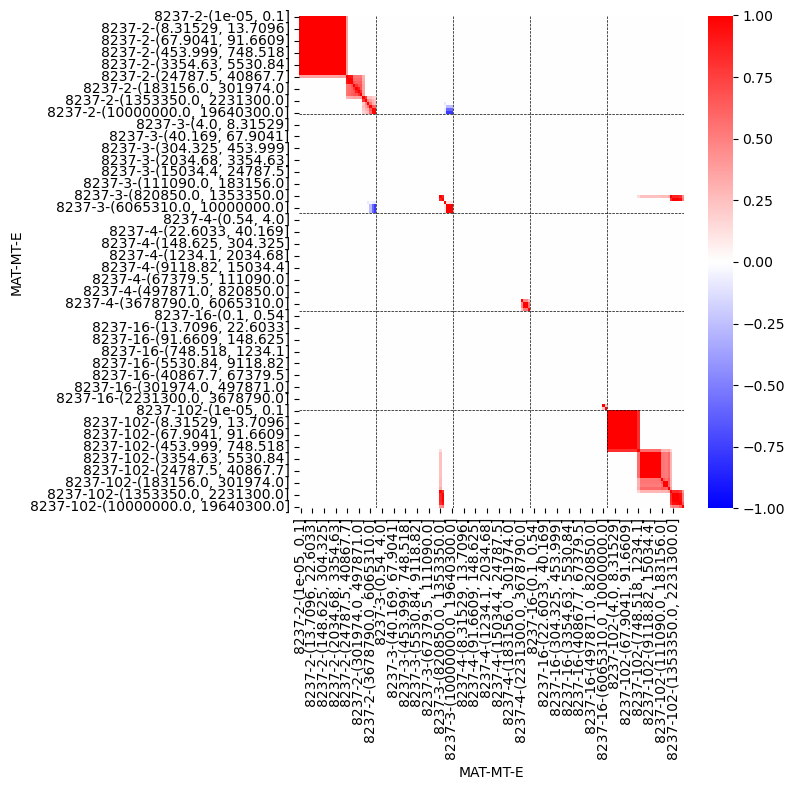

In [54]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
mask = cov_b80.data.index.get_level_values("MT") != 1

ng = cov_b80.data.index.get_level_values("MT")[~mask].size
nr = cov_b80.data.index.get_level_values("MT").unique().size - 1

data = cov_b80.get_corr().data.iloc[mask, mask]
sns.heatmap(data=data, vmin=-1, vmax=1, cmap="bwr", ax=ax)
for i in range(1, nr):
    ax.axvline(ng * i, color="k", ls="--", lw=.5)
    ax.axhline(ng * i, color="k", ls="--", lw=.5)
fig.tight_layout()

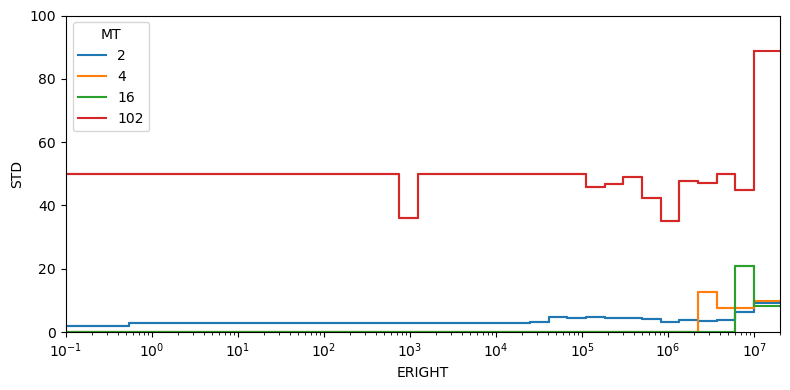

In [73]:
mts = [2, 4, 16, 102]
s = cov_b80.get_std().reset_index().query("MT in @mts")
s["ERIGHT"] = [x.right for x in s.E]
s["ELEFT"] = [x.left for x in s.E]
s["MT"] = s["MT"].astype("category")
s["STD"] *= 100

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
sns.lineplot(data=s, x="ERIGHT", y="STD", ax=ax, hue="MT", drawstyle="steps-pre")
sns.lineplot(data=s, x="ELEFT", y="STD", ax=ax, hue="MT", drawstyle="steps-post", legend=None)
ax.set(xlim=(1e-1, 2e7), xscale="log", ylim=[0, 100], ylabel="standard deviation / $\%$", xlabel="energy / $eV$")
fig.tight_layout()

## JENDL-4.0u

In [74]:
err = sandy.get_endf6_file("jendl_40u", "xs", 822080).get_errorr(err=1, chi=False, mubar=False, errorr33_kws=dict(ign=19))["errorr33"]

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    


In [75]:
cov_j40 = err.get_cov()

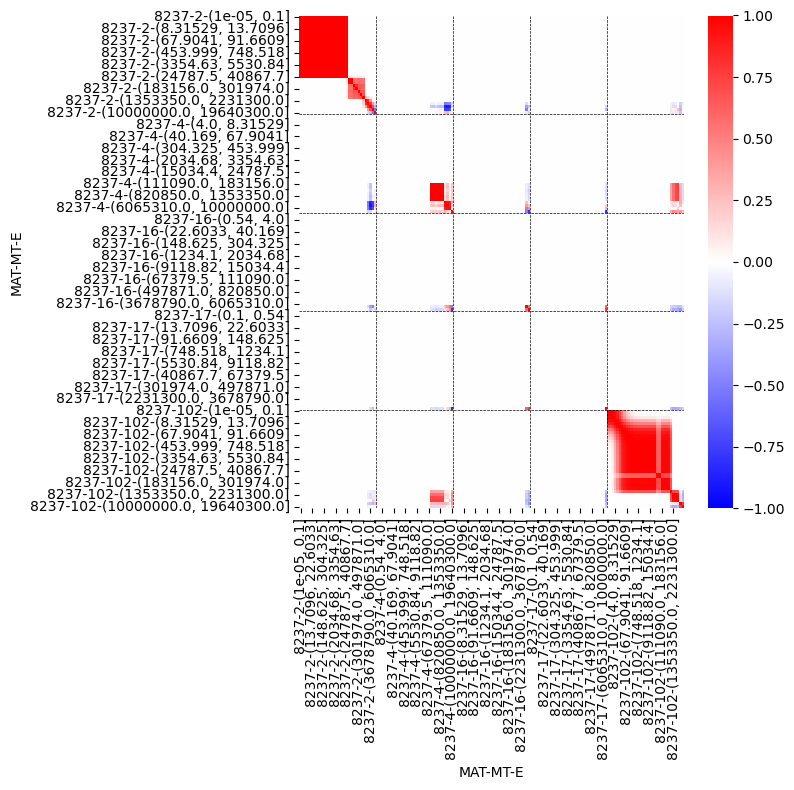

In [84]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
mask = cov_j40.data.index.get_level_values("MT") != 1

ng = cov_j40.data.index.get_level_values("MT")[~mask].size
nr = cov_j40.data.index.get_level_values("MT").unique().size - 1

data = cov_j40.get_corr().data.iloc[mask, mask]

mask2 = data.index.get_level_values("MT").isin(range(51, 92))

sns.heatmap(data=data.iloc[~mask2, ~mask2], vmin=-1, vmax=1, cmap="bwr", ax=ax)
for i in range(1, nr):
    ax.axvline(ng * i, color="k", ls="--", lw=.5)
    ax.axhline(ng * i, color="k", ls="--", lw=.5)
fig.tight_layout()

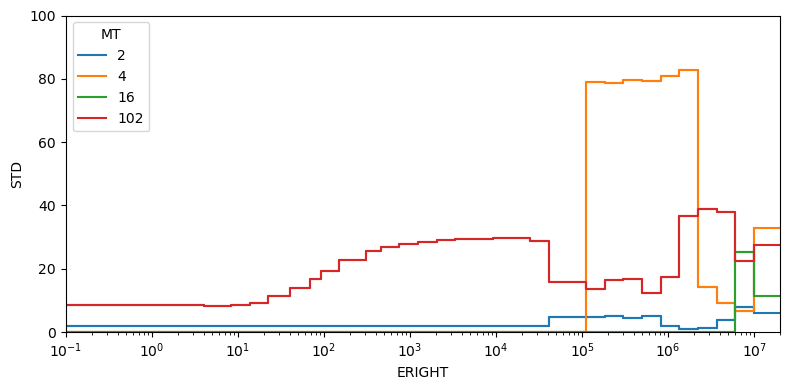

In [86]:
mts = [2, 4, 16, 102]
s = cov_j40.get_std().reset_index().query("MT in @mts")
s["ERIGHT"] = [x.right for x in s.E]
s["ELEFT"] = [x.left for x in s.E]
s["MT"] = s["MT"].astype("category")
s["STD"] *= 100

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
sns.lineplot(data=s, x="ERIGHT", y="STD", ax=ax, hue="MT", drawstyle="steps-pre")
sns.lineplot(data=s, x="ELEFT", y="STD", ax=ax, hue="MT", drawstyle="steps-post", legend=None)
ax.set(xlim=(1e-1, 2e7), xscale="log", ylim=[0, 100], ylabel="standard deviation / $\%$", xlabel="energy / $eV$")
fig.tight_layout()

## JEFF-3.3

In [87]:
err = sandy.get_endf6_file("jeff_33", "xs", 822080).get_errorr(err=1, chi=False, mubar=False, errorr33_kws=dict(ign=19))["errorr33"]

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    


In [88]:
cov_j33 = err.get_cov()

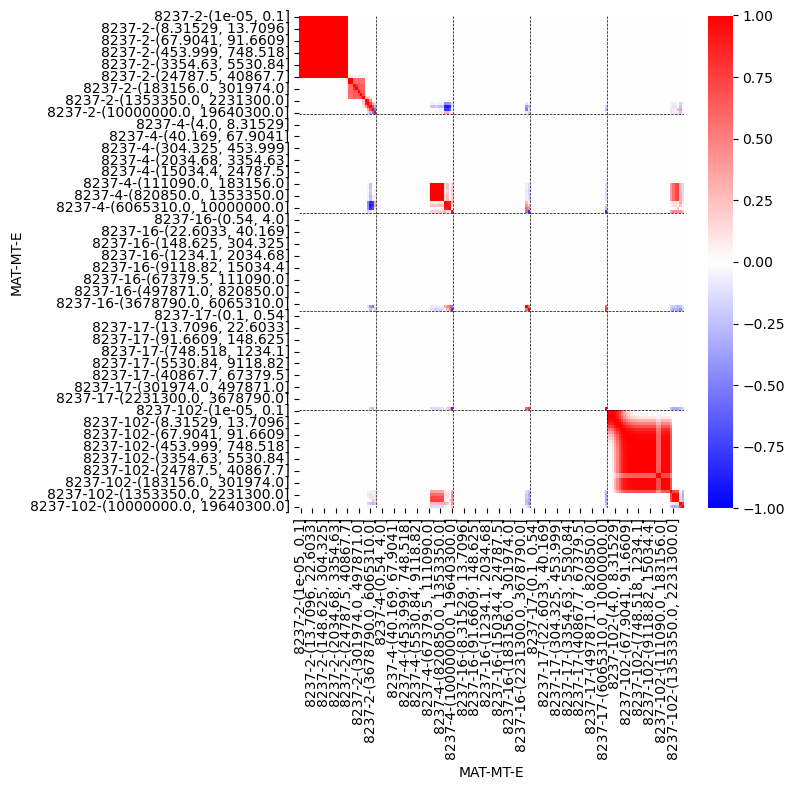

In [89]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
mask = cov_j33.data.index.get_level_values("MT") != 1

ng = cov_j33.data.index.get_level_values("MT")[~mask].size
nr = cov_j33.data.index.get_level_values("MT").unique().size - 1

data = cov_j33.get_corr().data.iloc[mask, mask]

mask2 = data.index.get_level_values("MT").isin(range(51, 92))

sns.heatmap(data=data.iloc[~mask2, ~mask2], vmin=-1, vmax=1, cmap="bwr", ax=ax)
for i in range(1, nr):
    ax.axvline(ng * i, color="k", ls="--", lw=.5)
    ax.axhline(ng * i, color="k", ls="--", lw=.5)
fig.tight_layout()

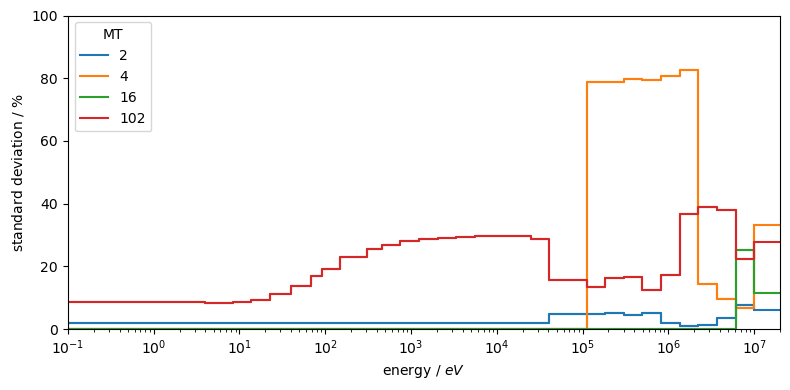

In [94]:
mts = [2, 4, 16, 102]
s = cov_j33.get_std().reset_index().query("MT in @mts")
s["ERIGHT"] = [x.right for x in s.E]
s["ELEFT"] = [x.left for x in s.E]
s["MT"] = s["MT"].astype("category")
s["STD"] *= 100

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
sns.lineplot(data=s, x="ERIGHT", y="STD", ax=ax, hue="MT", drawstyle="steps-pre")
sns.lineplot(data=s, x="ELEFT", y="STD", ax=ax, hue="MT", drawstyle="steps-post", legend=None)
ax.set(xlim=(1e-1, 2e7), xscale="log", ylim=[0, 100], ylabel="standard deviation / $\%$", xlabel="energy / $eV$")
fig.tight_layout()